<a href="https://colab.research.google.com/github/areegtarek/Huawei-HCIA-AI/blob/main/3-%20MINIST%20Logistic%20Regression/MINIST_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST database of handwritten digits**

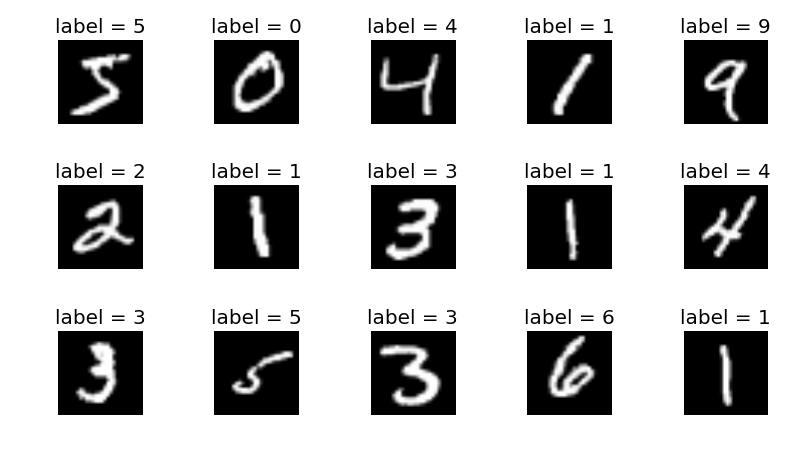

**Logistic regression and Keras for classification**

https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/

In [ ]:
import numpy as np
from tensorflow import keras
print (keras.__version__)

2.9.0


In [ ]:
from keras.datasets import mnist

#We import data into variables and check their shape.

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
#we create new variables that contain only zeros and ones.

x_train_new, y_train_new = x_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]

#Let’s check the shape of the new variables.

x_train_new.shape

(12665, 28, 28)

In [ ]:
12665/32

395.78125

In [ ]:
y_train_new[0:10]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=uint8)

In [ ]:
#we need to flatten data into two dimensions only: index and flattened image data (28 * 28 = 784).

x_train_final = x_train_new.reshape((-1, 784))
x_train_final.shape

(12665, 784)

In [ ]:
#A similar sequence of operations we perform for the test set.

x_test_new, y_test_new = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]
x_test_new.shape

(2115, 28, 28)

In [ ]:
x_test_final = x_test_new.reshape((-1, 784))


In [ ]:
#The last element of data preprocessing is their normalization.

x_train_final = x_train_final / 255
x_test_final = x_test_final / 255

Model:   polynomial value: x1 * w1 + x2 * w2 + … + x784 * w784

In [ ]:
model = keras.Sequential(keras.layers.Dense(2, input_shape=(784,), activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [ ]:
785*2

1570

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
results=model.fit(
  x=x_train_final,
  y=y_train_new,
  shuffle=True,
  epochs=30,
  batch_size=32,
  validation_data=(x_test_final, y_test_new)
)

Epoch 1/30
396/396 [==============================] - 3s 3ms/step - loss: 0.0804 - accuracy: 0.9852 - val_loss: 0.0210 - val_accuracy: 0.9986
Epoch 2/30
396/396 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9972 - val_loss: 0.0125 - val_accuracy: 0.9991
Epoch 3/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9974 - val_loss: 0.0093 - val_accuracy: 0.9991
Epoch 4/30
396/396 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.0077 - val_accuracy: 0.9991
Epoch 5/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9977 - val_loss: 0.0067 - val_accuracy: 0.9991
Epoch 6/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.0060 - val_accuracy: 0.9991
Epoch 7/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 

In [ ]:
eval = model.evaluate(x=x_test_final, y=y_test_new)

67/67 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9995


Text(0, 0.5, 'Losses')

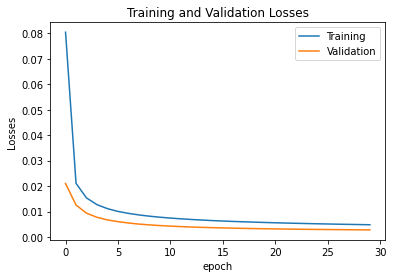

In [ ]:

import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

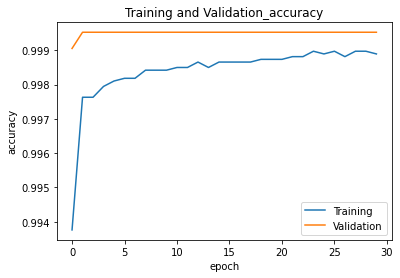

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')